Sea el modelo de programación linea definido de la siguiente forma,

$$ \text{max}_{x_1,x_2} Z = x_1 + 3x_2 $$

Sujeto a las siguientes restricciones

$$ x_1 + 2x_2 \leq 16 $$
$$ 2x_1 + x_2 \leq 20 $$
$$ x_1 \leq 9 $$
$$ x_2 \leq 6 $$
$$ x_1, x_2 \geq 0 $$

Para empezar tenemos que instalar gurobi en python a través de gurobipy.

In [ ]:
pip install gurobipy

Primero cargamos la librería de gurobi para traer las funciones necesarias. Usamos el comando $*$ para traer todas las funciones y no algunas específicas. También podemos traer algunas funciones específicas, pero para este caso traemos todo independiente de la eficiencia del código.

In [ ]:
from gurobipy import *

Ahora creamos el modelo a través de la función $\textbf{Model()}$

In [ ]:
modelo = Model()

Si imprimimos el modelo se nos entrega información respecto a restricciones, variables, y parámetros incluídos.

In [ ]:
print(modelo)

<gurobi.Model Continuous instance Unnamed: 0 constrs, 0 vars, No parameter changes>


Agregamos dos variables al modelo, $x_1$ y $x_2$ que son las que se presentaron en la formulación anterior. Las variables son de tipo continuo, por eso utilizamos el tipo $\textbf{GRB.CONTINUOUS}$.

In [ ]:
x_1 = modelo.addVar(vtype = GRB.CONTINUOUS, name = 'x_1')
x_2 = modelo.addVar(vtype = GRB.CONTINUOUS, name = 'x_2')

A continuación creamos la función objetivo

In [ ]:
obj_fn = x_1 + 3*x_2

Y añadimos la función objetivo al modelo

In [ ]:
modelo.setObjective(obj_fn, GRB.MAXIMIZE)
modelo.update()

Si imprimimos el modelo nos actualiza que hay 2 variables agregadas, todavía no hemos agregado las restricciones por lo que aparece el "0 constrs".

In [ ]:
print(modelo)

<gurobi.Model Continuous instance Unnamed: 0 constrs, 2 vars, No parameter changes>


Agregamos las restricciones al modelo a través del comando $\textbf{addConstr()}$

In [ ]:
modelo.addConstr(x_1 + 2*x_2 <= 16)
modelo.addConstr(2*x_1 + x_2 <= 20)
modelo.addConstr(x_1 <= 9)
modelo.addConstr(x_2 <= 6)

<gurobi.Constr *Awaiting Model Update*>

Agregamos la no-negatividad de las variables de decisión

In [ ]:
modelo.addConstr(x_1 >= 0)
modelo.addConstr(x_2 >= 0)

<gurobi.Constr *Awaiting Model Update*>

Actualizamos el modelo para que integre todas las variables de decisión, las restricciones y la función objetivo

In [ ]:
modelo.update()
print(modelo)

<gurobi.Model Continuous instance Unnamed: 6 constrs, 2 vars, No parameter changes>


Agregamos una características para que el modelo entregue detalle del proceso de optimización

In [ ]:
modelo.setParam('OutputFlag', True)

Set parameter OutputFlag to value 1


In [ ]:
modelo.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 6 rows, 2 columns and 8 nonzeros
Model fingerprint: 0x5e1d1cae
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 2e+01]
Presolve removed 4 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4000000e+01   1.000000e+00   0.000000e+00      0s
       1    2.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.200000000e+01


Mostramos el valor de las variables en el óptimo

In [ ]:
for v in modelo.getVars():
    print(f"Valor variable {v.VarName} = {v.X}")

Valor variable x_1 = 4.0
Valor variable x_2 = 6.0


In [ ]:
modelo.getVars()


[<gurobi.Var x_1 (value 4.0)>, <gurobi.Var x_2 (value 6.0)>]

Podemos verificar la solución anterior revisando el gráfico con las restricciones

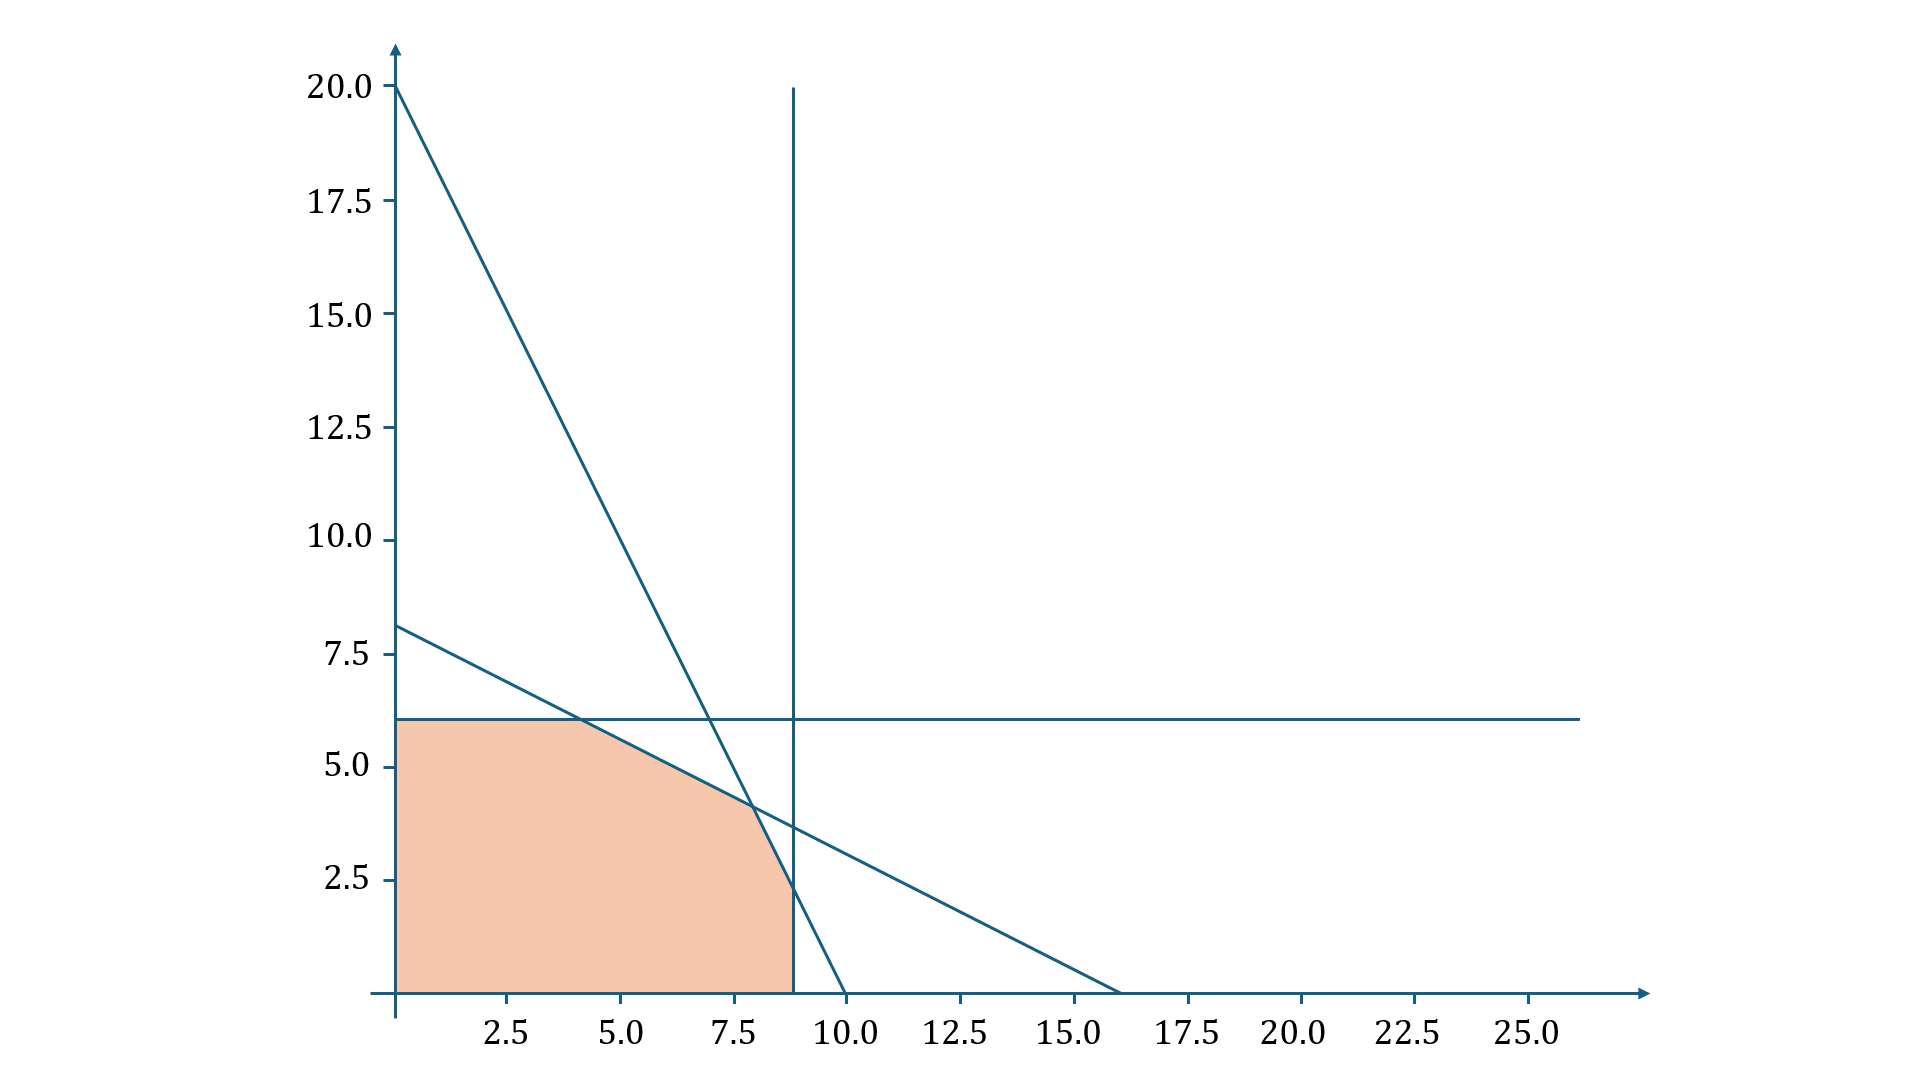

## Análisis de sensibilidad para los parámetros en la Función Objetivo

La sensibilización de los parámetros que acompañan a las variables de decisión en la F.O. se muestra a continuación. Recordemos que la función objetivo tiene la siguiente forma,

$$ Z = x_1 + 3x_2 $$

Queremos saber cuánto pueden variar los parámetros (costos) que acompañan a las variables de decisión en la F.O. ya sea en términos de $x_1$ o $x_2$, esto es,

$$ Z = (1 + \delta)x_1 + 3x_2 $$

$$ Z = x_1 + (3 + \delta)x_2 $$

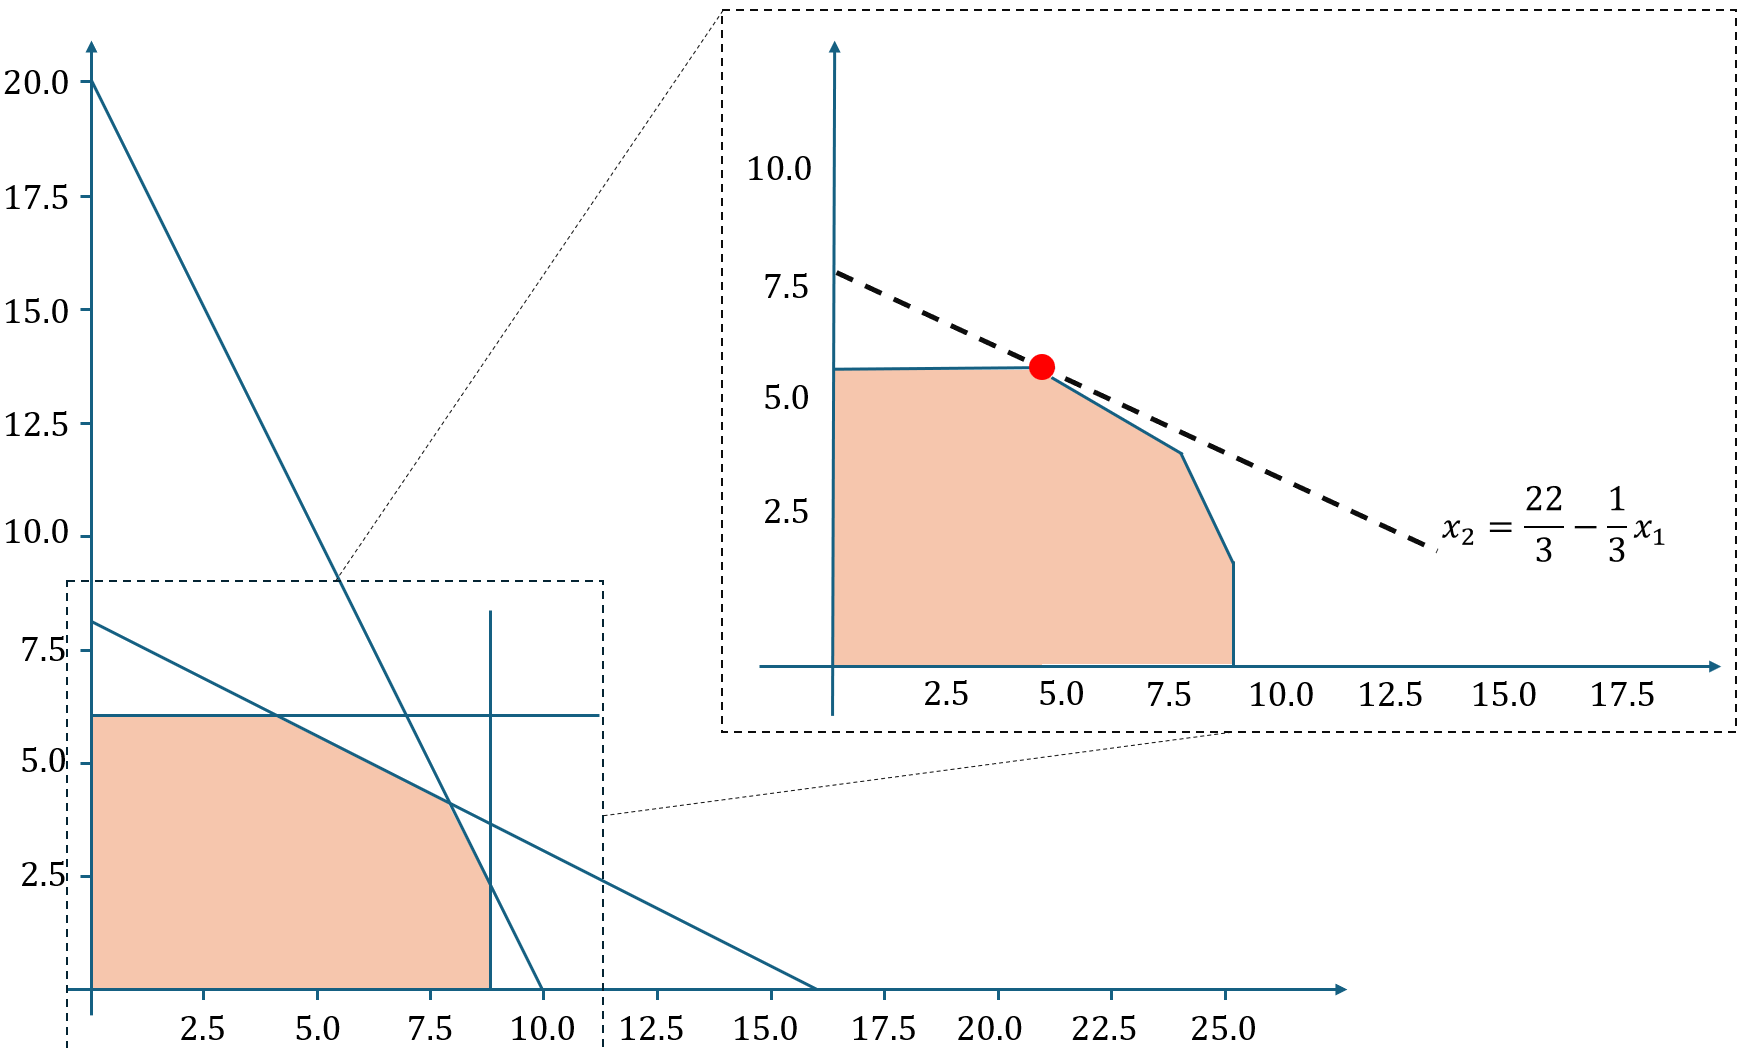

Por tanto, si queremos sensibilizar los parámetros de las variables de decisión en la función objetivo tendríamos que resolver una serie de ecuaciones a modo de encontrar los valores de $\delta_1$ y $\delta_2$. En términos generales esto es hacer que la pendiente de la función objetivo se iguale con la pendiente de alguna de las dos restricciones activas en el problema.

$$ -\frac{1+\delta_1}{3} = 0, $$

$$ -\frac{1 + \delta_2}{3} = -\frac{1}{2}, $$

$$ -\frac{1}{3+\delta_1} = 0 $$

$$ -\frac{1}{3+\delta_2} = -\frac{1}{2} $$




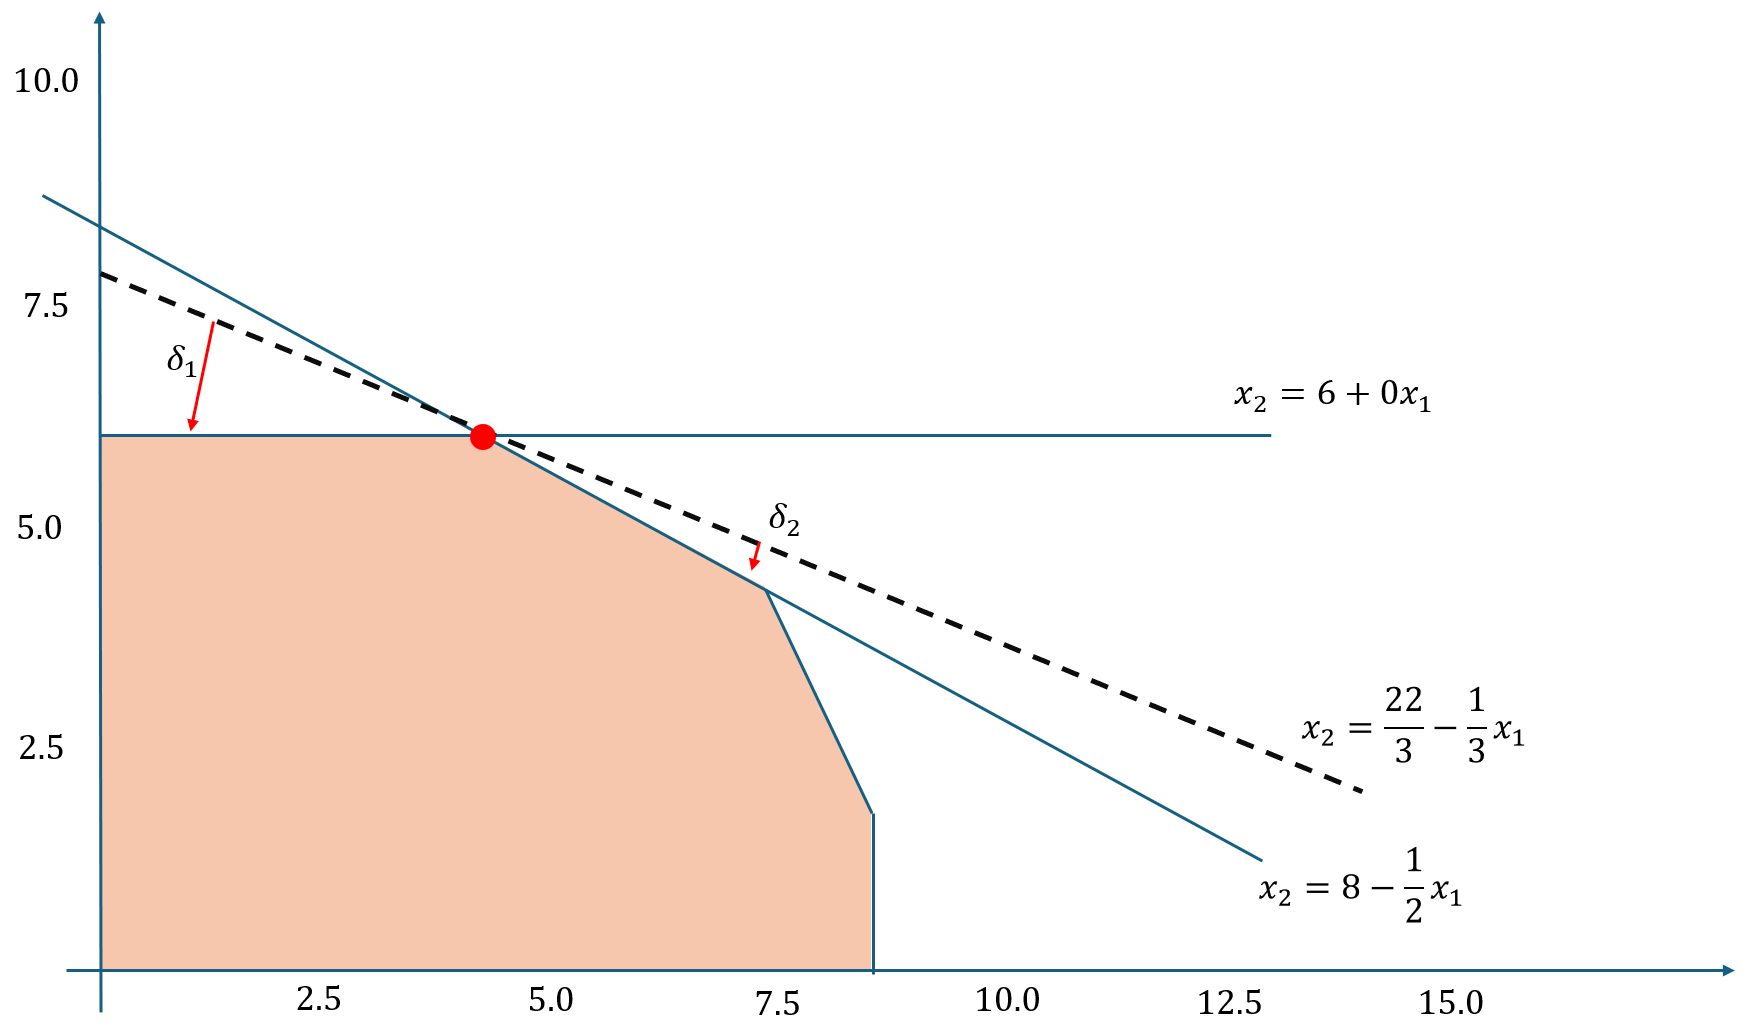

El siguiente código entrega el resultado del análisis de sensibilidad sin necesidad de resolver las ecuaciones mostradas anteriormente. De acá podemos extraer que, para que el punto $(4,6)$ no cambie como punto óptimo, el parámetro que acompaña a la variable $x_1$ en la función objetivo debe estar contenido en el intervalo $(0,1.5)$, mientras que para la variable $x_2$ el parámetro debe estar contenido en $(2, +\infty)$. Notar que en el caso que el valor de los parámetros toquen los límites del intervalo tenemos múltiples soluciones para el problema, y en caso de salir del intervalo la solución cambia.

In [ ]:
modelo.printAttr(['X', 'Obj', 'SAObjLow', 'SAObjUp'])


    Variable            X          Obj     SAObjLow      SAObjUp 
----------------------------------------------------------------
         x_1            4            1           -0          1.5 
         x_2            6            3            2          inf 


## Análisis de sensibilidad en las restricciones

Observemos la tabla a continuación, la columna RHS tiene el valor del parámetro de la parte derecha de las restricciones y al lado aparecen los límites inferior y superior de estos parámetros. Tomemos, por simplicidad, la restricción siguiente,

$$ x_2 <= 6 $$

El límite inferior que puede tener es 4 y el límite superior es 8, estos límites se aprecian mejor en el GIF a continuación.

In [ ]:
modelo.printAttr(['Sense', 'Slack', 'Pi', 'RHS', 'SARHSLow', 'SARHSUp'])


  Constraint        Sense        Slack           Pi          RHS     SARHSLow      SARHSUp 
------------------------------------------------------------------------------------------
          R0            <            0            1           16           12           19 
          R1            <            6            0           20           14          inf 
          R2            <            5            0            9            4          inf 
          R3            <            0            1            6            4            8 
          R4            >           -4            0            0         -inf            4 
          R5            >           -6            0            0         -inf            6 


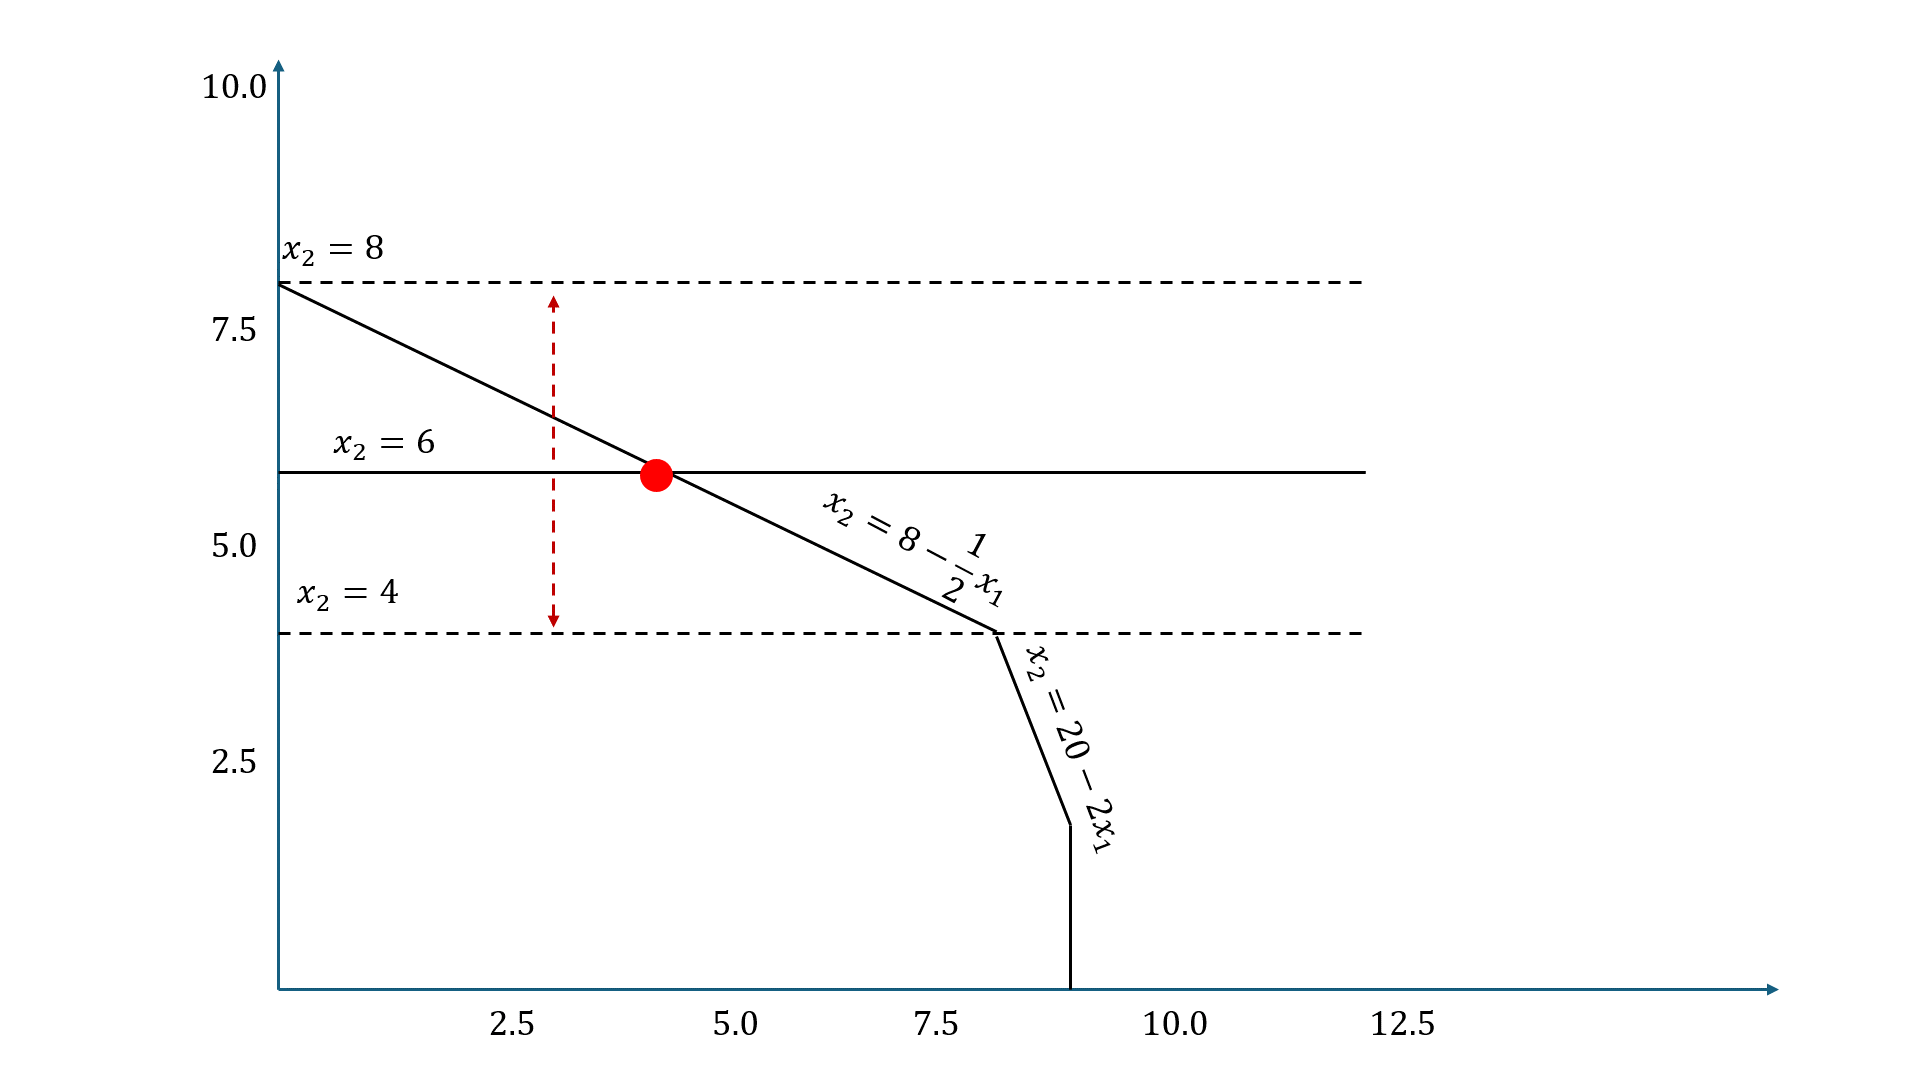

In [ ]:
modelo.printAttr(['X', 'RC', 'LB', 'SALBLow', 'SALBUp', 'UB', 'SAUBLow', 'SAUBUp'])


    Variable            X           RC           LB      SALBLow       SALBUp           UB      SAUBLow       SAUBUp 
--------------------------------------------------------------------------------------------------------------------
         x_1            4            0            0         -inf            4          inf            4          inf 
         x_2            6            0            0         -inf            6          inf            6          inf 


### Problema de transporte con transbordo

Una empresa distribuye dos productos A y B desde dos fábricas hacia tres tiendas T1, T2 y T3. Por temas logísticos no existen rutas directas desde las fábricas a las tiendas por lo que deben pasar por centros de distribución intermedio. Sabemos que la fábrica 1 tiene una capacidad de producción de 100 unidades de A y 150 unidades de B, mientras que la fábrica 2 tiene una capacidad de producción de 120 unidades de A y 120 unidades de B. La tienda T1 tiene una demanda de 80 unidades de A y 60 unidades de B, la tienda T2 tiene una demanda de 90 unidades de A y 100 unidades de B, mientras que la tienda T3 tiene una demanda de 50 unidades de A y 40 unidades de B. Denotamos los centros de distribución como C1 y C2. La tabla a continuación muestra los costos unitarios de envío desde las fábricas hacia los centros de distribución.

| Desde / Hacia | C1 | C2 |
|---|---|---|
| F1 | 2 | 4 |
| F2 | 3 | 2 |

La siguiente tabla muestra los costos de envío desde los centros de distribución a las tiendas.

| Desde / Hacia | T1 | T2 | T2 |
|---|---|---|---|
| C1 | 4 | 5 | 6 |
| C2 | 3 | 4 | 5 |

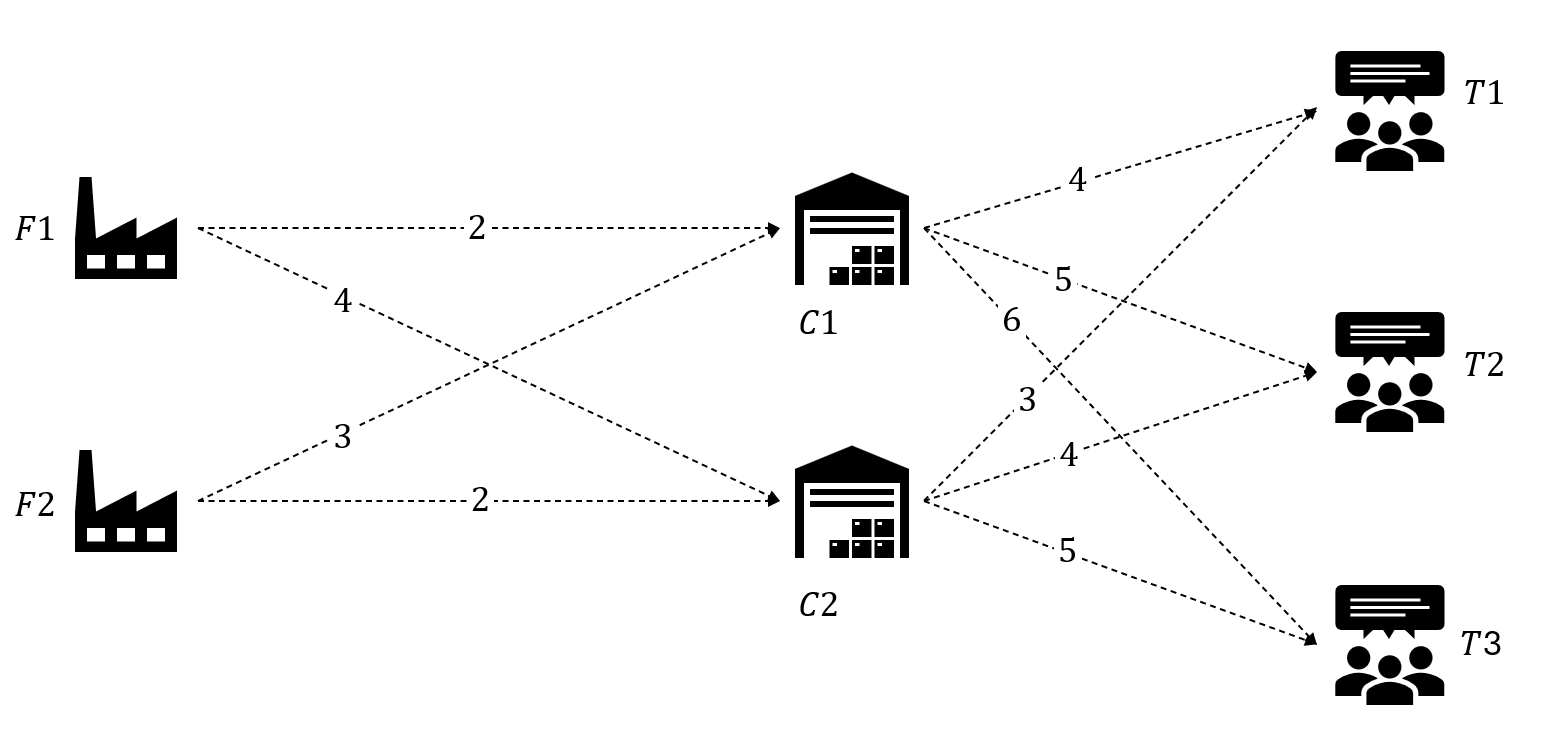


### Modelo de clase

Conjuntos del modelo

- Productos: $ P = \{A,B\} $.

- Fábricas: $F = \{F_1, F_2\} $

- Centros: $ C = \{C_1, C_2\} $

- Clientes $ T = \{T_1,T_2,T_3\}$

Variables de decisión:

- $x_{ij}^{p}$, cantidad de producto $p$ enviado desde el nodo $i$ al nodo $j$, tal que $p\in P, i \in F, j \in C$.

- $x_{jk}^{p}$, cantidad de producto $p$ enviado desde el nodo $j$ al nodo $k$, tal que $p \in P, j \in C, k \in T$.

Parámetros

- $c_{ij}$, costo de enviar desde el nodo $i$ al nodo $j$.

- $ O_i^{p}$, oferta del nodo $i$ del producto $p$, tal que $i \in F$ (capacidad de producción), y $p \in P$.

- $ L_j $, capacidad de transbordo del centro $j$, tal que $j \in C$.

- $ D_k^{p} $, demanda del cliente $k$ del producto $p$, tal que $k \in T, p \in P$.

La función objetivo a minimizar se muestra a continuación.

$$ \text{min}_{x_{ij}^{p}, x_{jk}^{p}} \biggl{\{}\sum_{p\in P} \sum_{i \in F} \sum_{j \in C} c_{ij}x_{ij}^{p} + \sum_{p\in P} \sum_{j \in C} \sum_{k \in T} c_{jk} x_{jk}^{p} \biggl{\}}$$

Sujeto a lo siguiente:

- Las fábricas no pueden producir más que su capacidad para cada producto. Esto se mide indicando que la cantidad de productos que envían desde $i$ a $j$ del producto $p$ no puede superar la capacidad establecida de dicho producto.

$$ \sum_{j \in C} x_{ij}^{p} \leq O_i^{p}, \forall p \in P,  \forall i \in F $$

- Los centros logísticos no pueden recibir más que su capacidad de distribución, esto es independiente del producto que reciban, dado que la capacidad es total.

$$ \sum_{p \in P} \sum_{i \in F} x_{ij}^{p} \leq L_j, \forall j \in C $$

- Los clientes deben tener su demanda satisfecha para cada producto. Esto se mide como la cantidad de productos que reciben desde los nodos $j$ a los nodos $k$ (clientes), por producto.

$$ \sum_{j \in C} x_{ij}^{p} = D_k^{p}, \forall k \in T, \forall p \in P $$

- Equilibrio entre la fase de envío de las fábricas a los centros, y desde los centros a los clientes. Todo lo que se envía desde la primera parte de envío debe ser igual a lo que sale en la segunda parte.

$$ \sum_{i \in F} x_{ij}^{p} = \sum_{k \in T} x_{jk}^{p} \forall j \in C, \forall p \in P $$

- No-negatividad

$$ x_{ij}^{p} \geq 0 $$

In [ ]:
# Conjuntos
Fabricas  = ['F1','F2']
Centros   = ['C1','C2']
Tiendas   = ['T1','T2','T3']
Productos = ['A','B']

# Datos
Oferta = {
    ('F1','A'): 100, ('F1','B'): 150,
    ('F2','A'): 120, ('F2','B'): 100
}

Demanda = {
    ('T1','A'): 80, ('T1','B'): 60,
    ('T2','A'): 90, ('T2','B'):100,
    ('T3','A'): 50, ('T3','B'):40
}

Capacidades = {
    'C1':250,
    'C2':200
}

Costos_fabrica_centro = {
    ('F1', 'C1'): 2, ('F1', 'C2'): 4,
    ('F2', 'C1'): 3, ('F2', 'C2'): 2,
}

Costos_centro_tienda = {
    ('C1', 'T1'): 4, ('C1', 'T2'): 5, ('C1', 'T3'): 6,
    ('C2', 'T1'): 3, ('C2', 'T2'): 4, ('C2', 'T3'): 5,
}

In [ ]:
Oferta

{('F1', 'A'): 100, ('F1', 'B'): 150, ('F2', 'A'): 120, ('F2', 'B'): 100}

In [ ]:
Demanda

{('T1', 'A'): 80,
 ('T1', 'B'): 60,
 ('T2', 'A'): 90,
 ('T2', 'B'): 100,
 ('T3', 'A'): 50,
 ('T3', 'B'): 40}

In [ ]:
# Definimos el modelo
from gurobipy import *

model = Model("Transporte_transbordo_multiproducto")

# Variables de decisión
x_fabricas_centros = model.addVars(Fabricas, Centros, Productos, name="x_fc", vtype=GRB.CONTINUOUS)
x_centros_tiendas  = model.addVars(Centros, Tiendas, Productos, name="x_cs", vtype=GRB.CONTINUOUS)

In [ ]:
x_fabricas_centros

{('F1', 'C1', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('F1', 'C1', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('F1', 'C2', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('F1', 'C2', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('F2', 'C1', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('F2', 'C1', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('F2', 'C2', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('F2', 'C2', 'B'): <gurobi.Var *Awaiting Model Update*>}

In [ ]:
x_centros_tiendas

{('C1', 'T1', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('C1', 'T1', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('C1', 'T2', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('C1', 'T2', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('C1', 'T3', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('C1', 'T3', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('C2', 'T1', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('C2', 'T1', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('C2', 'T2', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('C2', 'T2', 'B'): <gurobi.Var *Awaiting Model Update*>,
 ('C2', 'T3', 'A'): <gurobi.Var *Awaiting Model Update*>,
 ('C2', 'T3', 'B'): <gurobi.Var *Awaiting Model Update*>}

In [ ]:
model.setObjective(
    quicksum(Costos_fabrica_centro[(f, c)] * x_fabricas_centros[f, c, p] for f in Fabricas for c in Centros for p in Productos) +
    quicksum(Costos_centro_tienda[(c, s)] * x_centros_tiendas[c, s, p] for c in Centros for s in Tiendas for p in Productos),
    GRB.MINIMIZE
)

In [ ]:
# Restricciones del modelo

# Restricciones de oferta
for f in Fabricas:
    for p in Productos:
        model.addConstr(
            quicksum(x_fabricas_centros[f, c, p] for c in Centros) <= Oferta[(f, p)],
            name=f"Supply_{f}_{p}"
        )

In [ ]:
# Restricciones de demanda
for s in Tiendas:
    for p in Productos:
        model.addConstr(
            quicksum(x_centros_tiendas[c, s, p] for c in Centros) == Demanda[(s, p)],
            name=f"Demand_{s}_{p}"
        )

In [ ]:
# Conservación del flujo
for c in Centros:
    for p in Productos:
        model.addConstr(
            quicksum(x_fabricas_centros[f, c, p] for f in Fabricas) ==
            quicksum(x_centros_tiendas[c, s, p] for s in Tiendas),
            name=f"FlowConservation_{c}_{p}"
        )

In [ ]:
# Capacidad de los centros
for c in Centros:
    model.addConstr(
        quicksum(x_fabricas_centros[f, c, p] for f in Fabricas for p in Productos) <= Capacidades[c],
        name=f"CenterCapacity_{c}"
    )

In [ ]:
# Optimización
model.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 16 rows, 20 columns and 48 nonzeros
Model fingerprint: 0x9cf916b6
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 2e+02]
Presolve removed 6 rows and 10 columns
Presolve time: 0.03s
Presolved: 10 rows, 10 columns, 28 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6300000e+03   5.250000e+01   0.000000e+00      0s
       5    2.6900000e+03   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.05 seconds (0.00 work units)
Optimal objective  2.690000000e+03


In [ ]:
if model.status == GRB.OPTIMAL:
    print("\nOptimal Solution Found:\n")
    for f in Fabricas:
        for c in Centros:
            for p in Productos:
                if x_fabricas_centros[f, c, p].X > 0:
                    print(f"Factory {f} -> Center {c} (Product {p}): {x_fabricas_centros[f, c, p].X:.1f} units")

    for c in Centros:
        for s in Tiendas:
            for p in Productos:
                if x_centros_tiendas[c, s, p].X > 0:
                    print(f"Center {c} -> Store {s} (Product {p}): {x_centros_tiendas[c, s, p].X:.1f} units")

    print(f"\nTotal Cost: {model.ObjVal:.2f}")

else:
    print("No optimal solution found.")


Optimal Solution Found:

Factory F1 -> Center C1 (Product A): 100.0 units
Factory F1 -> Center C1 (Product B): 120.0 units
Factory F2 -> Center C2 (Product A): 120.0 units
Factory F2 -> Center C2 (Product B): 80.0 units
Center C1 -> Store T1 (Product B): 60.0 units
Center C1 -> Store T2 (Product A): 50.0 units
Center C1 -> Store T2 (Product B): 20.0 units
Center C1 -> Store T3 (Product A): 50.0 units
Center C1 -> Store T3 (Product B): 40.0 units
Center C2 -> Store T1 (Product A): 80.0 units
Center C2 -> Store T2 (Product A): 40.0 units
Center C2 -> Store T2 (Product B): 80.0 units

Total Cost: 2690.00


In [ ]:
model.printAttr(['X', 'Obj', 'SAObjLow', 'SAObjUp'])


    Variable            X          Obj     SAObjLow      SAObjUp 
----------------------------------------------------------------
x_fc[F1,C1,A]          100            2         -inf            2 
x_fc[F1,C1,B]          120            2            2            3 
x_fc[F1,C2,A]            0            4            2          inf 
x_fc[F1,C2,B]            0            4            2          inf 
x_fc[F2,C1,A]            0            3            2          inf 
x_fc[F2,C1,B]            0            3            2          inf 
x_fc[F2,C2,A]          120            2            2            3 
x_fc[F2,C2,B]           80            2            1            2 
x_cs[C1,T1,A]            0            4            4          inf 
x_cs[C1,T1,B]           60            4         -inf            4 
x_cs[C1,T2,A]           50            5            5            5 
x_cs[C1,T2,B]           20            5            5            6 
x_cs[C1,T3,A]           50            6         -inf            

## Problema de Cobertura

####Conjuntos y parametros
$N$: Conjunto de nodos\\
$M$: Conjunto de posibles localizaciones\\
$a_{ij}$: Parámetro de cobertura que es 1, si el nodo $i\in M$ cubre al nodo $j\in N$; 0, en otro caso. \\
$f_i$: Costo de localizar una instalación en el nodo $i \in M$\\

####Variables de decisión
$x_i$: 1, si se lozaliza una instalación en $i \in M$

### Modelo de optimización
\begin{equation}
Mínz=\sum_{i\in M}f_i x_i
\end{equation}
s.a.\
\begin{equation}
\sum_{i\in M}a_{ij}x_i \geq 1, \forall j \in N
\end{equation}
\begin{equation}
x_i \in \{0,1\}, \forall i \in M
\end{equation}



Para esta práctica utilizaremos datos reales de la Región Metropolitana que podran descargar desde XXX.
Si visualizamos el archivo podemos notar que tenemos poca información, faltan distancias. Para calcular las distancias instalaremos el paquete geopy el cual nos ayudará a encontrar direcciones, coordenadas, distancias, entre otros datos espaciales (Más información en: https://geopy.readthedocs.io/en/stable/).


In [ ]:
!pip install geopy

Importamos de la libreria geopy el modulo de Nominatim. Esto nos permite utilizar datos directamente de OpenStreetMaps, el cual no utiliza licencia y es gratis  (Más información en: https://nominatim.org/)

In [ ]:
from geopy.geocoders import Nominatim

Activamos la geolocalización de Nominatim

In [ ]:
geolocator = Nominatim(timeout=10, user_agent = "dlab.berkeley.edu-workshop")

Cargamos los datos utilizando libreria pandas.
La libreria pandas nos permite leer y modificar archivos excel. En este caso los leeremos.

In [ ]:
import pandas as pd

In [ ]:
datos_clientes = pd.read_excel("Datos.xlsx")
datos_puntos = pd.read_excel("Candidatos.xlsx")

Podemos visualizar los datos en pantalla

In [ ]:
datos_clientes

HWB No Orig Ctry Orig Stn Orig Fac Dest Ctry Dest Stn Dest Fac Prod  \
0    1589832996        CL      SCL      SCL        ES      VIT      BAB    7   
1    3353075832        CL      SCL      SCL        SE      ARN      GTW    7   
2    4180552574        CL      SCL      SCL        HT      PAP      GTW    7   
3    4180552574        CL      SCL      SCL        HT      PAP      GTW    7   
4    8057706650        CL      SCL      SCL        CL      CCP      PMC    N   
..          ...       ...      ...      ...       ...      ...      ...  ...   
287  2783017311        CL      SCL      SCL        US      TMB      EYW    8   
288  1996629180        CL      SCL      SCL        US      BFI      SEA    8   
289  9942381993        CL      SCL      SCL        MX      DGG      DGG    P   
290  3326419762        CL      SCL      SCL        PE      IQT      TRU    7   
291  8223643492        CL      SCL      SCL        EC      UIO      AVC    8   

     Piece No  Weight  ...                                        Description  \
0           1    0.07  ...                              DOCUMENTOS PERSONALES   
1           1    0.14  ...                                         DOCUMENTOS   
2           1    0.20  ...                                                DOX   
3           1    0.20  ...                                                DOX   
4           1    3.12  ...                           1 NOTEBOOK DELL INSPIRON   
..        ...     ...  ...                                                ...   
287         1    0.31  ...                          DOX, 1 LAPIZ Y 1 HUELLERO   
288         1    2.44  ...  1 PARLANTE, 1 CAMARA PIEZAS DE BICICLETA, UN L...   
289         1    2.64  ...                          INNER TUBE CONNECTION NSU   
290         1    0.07  ...                                         DOCUMENTOS   
291         1    2.84  ...               REPUESTOS DE MAQUINARIA DE ALIMENTOS   

    Service Codes                   Shpr Addr 1          Shpr Addr 2  \
0           TT-PS                    AVDA 2 SUR              1285 N/   
1              PS                   SAN ALFONSO                  299   
2              PS                 AV LAS TORRES                 4591   
3              PS                 AV LAS TORRES                 4591   
4              PS         CONTRAMAESTRE MICALVI                   75   
..            ...                           ...                  ...   
287      II-PS-DS  LO FONTECILLA 201 LAS CONDES                  NaN   
288   II-TT-PS-DS                HOTEL FUNDADOR           SERRANO 34   
289      II-PS-DS      PANAMERICANA NORTE 19434                  NaN   
290         TT-PS         ARANJUEZ PONIENTE 497     VALLE LO CAMPINO   
291      II-PS-DS   AVDA AMERICO VESPUCIO 507 B  VILLA ALTO JAHUEL 2   

    codigo postal     Shpr Addr 3  \
0         8320000  SANTIAGO CHILE   
1         8320000  SANTIAGO CHILE   
2         8320000  SANTIAGO CHILE   
3         8320000  SANTIAGO CHILE   
4         8320000  SANTIAGO CHILE   
..            ...             ...   
287       8320000  SANTIAGO CHILE   
288       8320000  SANTIAGO CHILE   
289       8320000  SANTIAGO CHILE   
290       8320000  SANTIAGO CHILE   
291       8320000  SANTIAGO CHILE   

                                             Shpr_Addr         Clock Start  \
0            AVDA 2 SUR 1285 N/ 8320000 SANTIAGO CHILE 2023-02-23 12:36:14   
1               SAN ALFONSO 299 8320000 SANTIAGO CHILE 2023-02-28 08:38:32   
2            AV LAS TORRES 4591 8320000 SANTIAGO CHILE 2023-02-13 07:13:56   
3            AV LAS TORRES 4591 8320000 SANTIAGO CHILE 2023-02-13 07:13:56   
4      CONTRAMAESTRE MICALVI 75 8320000 SANTIAGO CHILE 2023-02-28 13:46:28   
..                                                 ...                 ...   
287  LO FONTECILLA 201 LAS CONDES  8320000 SANTIAGO... 2023-02-15 15:31:41   
288   HOTEL FUNDADOR SERRANO 34 8320000 SANTIAGO CHILE 2023-02-06 13:46:53   
289   PANAMERICANA NORTE 19434  8320000 SANTIAGO CHILE 2023-03-

In [ ]:
datos_puntos

PUNTO DE VENTA               COMUNA  \
0           CAND1                Paine   
1           CAND2                 Buin   
2           CAND3           Isla Maipo   
3           CAND4             El Monte   
4           CAND5             Peñaflor   
5           CAND6        Padre Hurtado   
6           CAND7         San Bernardo   
7           CAND8           La Pintana   
8           CAND9            El Bosque   
9          CAND10          La Cisterna   
10         CAND11           La Florida   
11         CAND12          San Joaquin   
12         CAND13           San Miguel   
13         CAND14  Pedro Aguirre Cerda   
14         CAND15            Cerrillos   
15         CAND16            Talagante   
16         CAND17                Macul   
17         CAND18            Peñalolen   
18         CAND19             La Reina   
19         CAND20           Huechuraba   
20         CAND21             Recoleta   
21         CAND22        Independencia   
22         CAND23             Conchalí   
23         CAND24        Quinta Normal   
24         CAND25     Estación Central   
25         CAND26             Lo Prado   
26         CAND27                Renca   
27         CAND28          Cerro Navia   
28         CAND29             Pudahuel   
29         CAND30            Quilicura   
30         CAND31               Colina   
31         CAND32             Chicureo   
32         CAND33                Lampa   
33         CAND34             Curacavi   
34         CAND35            Melipilla   
35         CAND36                Rengo   
36         CAND37          Chimbarongo   
37         CAND38           Concepción   
38         CAND39               Temuco   
39         CAND40          San Antonio   
40         CAND41         Punta Arenas   

                                coordenadas    Latitud   Longitud  \
0   -33.808409109203936, -70.73605132062785 -33.808409 -70.736051   
1   -33.731057748731835, -70.74214412237082 -33.731058 -70.742144   
2    -33.74671295966727, -70.90410305399249 -33.746713 -70.904103   
3    -33.68144759346226, -70.98648230001585 -33.681448 -70.986482   
4   -33.606419757377296, -70.87725690344138 -33.606420 -70.877257   
5   -33.568230062932734, -70.81949508410568 -33.568230 -70.819495   
6    -33.58415468093737, -70.70520490641393 -33.584155 -70.705205   
7    -33.58523778816831, -70.62990603925978 -33.585238 -70.629906   
8     -33.55892087956414, -70.6784862088026 -33.558921 -70.678486   
9    -33.52888620709559, -70.66194543634298 -33.528886 -70.661945   
10  -33.528359437756656, -70.57652407797886 -33.528359 -70.576524   
11   -33.495746543322355, -70.6287889165977 -33.495747 -70.628789   
12  -33.496210422009256, -70.65368053621232 -33.496210 -70.653681   
13   -33.49166173289441, -70.67800077965242 -33.491662 -70.678001   
14   -33.50128428099066, -70.71086888378049 -33.501284 -70.710869   
15   -33.66239641020235, -70.92798527616712 -33.662396 -70.927985   
16    -33.4846186030894, -70.59808267252002 -33.484619 -70.598083   
17  -33.483771038262866, -70.54938641468058 -33.483771 -70.549386   
18    -33.44780358097332, -70.5461712296343 -33.447804 -70.546171   
19  -33.374991015431476, -70.63354428625311 -33.374991 -70.633544   
20  -33.406316543881594, -70.63900671698839 -33.406317 -70.639007   
21   -33.41593129621449, -70.66440176649799 -33.415931 -70.664402   
22  -33.382868125302956, -70.67785735314308 -33.382868 -70.677857   
23  -33.426555548927176, -70.69984619163895 -33.426556 -70.699846   
24   -33.46111553775558, -70.69933708625754 -33.461116 -70.699337   
25   -33.44575897740599, -70.72495661182377 -33.445759 -70.724957   
26   -33.40235961754657, -70.72338061753693 -33.402360 -70.723381   
27   -33.42313616080345, -70.73669977513536 -33.423136 -70.736700   
28   -33.44211822481327, -70.76006008241833 -33.442118 -70.760060   
29   -33.35749368751799, -70.72893902331693 -33.357494 -70.728939   
30    -33.20336615590401, -70.6791572239614 -33.203366 -70.679157   
31    -33.2711354241013, -70.6

Visualizar los datos cuando tenemos información geografica nos ayuda a entender mejor el problema.
Para esto utilizaremos mapas dinámicos con la libreria folium y branca (Más información en: https://pypi.org/project/folium/ https://pypi.org/project/branca/)

Para un mejor uso posterior en los mapas guardaremos la posición en un diccionario, además esto le dara una clave a cada punto de más facil lectura que la que tiene actualmente la base de datos.

In [ ]:
import folium
import branca

In [ ]:
posicion_clientes = {}
posicion_puntos = {}
for i in range(len(datos_clientes['HWB No'])):
  posicion_clientes[i] = (datos_clientes['Latitud'][i], datos_clientes['Longitud'][i])
print(posicion_clientes)
for i in range(len(datos_puntos['PUNTO DE VENTA'])):
  posicion_puntos[i] = (datos_puntos['Latitud'][i], datos_puntos['Longitud'][i])
print(posicion_puntos)

{0: (np.float64(-33.7435118), np.float64(-70.8616154)), 1: (np.float64(-33.4540253), np.float64(-70.6760428)), 2: (np.float64(-33.5007401), np.float64(-70.5854595)), 3: (np.float64(-33.5007401), np.float64(-70.5854595)), 4: (np.float64(-33.458218), np.float64(-70.5790093)), 5: (np.float64(-33.458218), np.float64(-70.5790093)), 6: (np.float64(-33.4507016), np.float64(-70.5465284)), 7: (np.float64(-33.2345565), np.float64(-70.8087229)), 8: (np.float64(-33.2345565), np.float64(-70.8087229)), 9: (np.float64(-33.5506128), np.float64(-70.6826333)), 10: (np.float64(-33.4310089), np.float64(-70.72185133846153)), 11: (np.float64(-33.53459355172414), np.float64(-70.62179120689656)), 12: (np.float64(-33.7210458), np.float64(-70.9171312)), 13: (np.float64(-33.3642442115774), np.float64(-70.55437639014593)), 14: (np.float64(-33.45402108111116), np.float64(-70.82472344323476)), 15: (np.float64(-33.45402108111116), np.float64(-70.82472344323476)), 16: (np.float64(-33.4723593), np.float64(-70.5959566)

Folium y branca en conjunto nos puede brindar algunos mapas dinamicos con distintas caracteristicas.
Podemos cambiar las caracteristicas de estos mapas a nuestro gusto personal.

In [ ]:
mi_mapa = folium.Map(location=(-33.4, -70.6), zoom_start=9, maptype="satellite") #Crea mapa
marcador = {}; arrow={}

html1 = lambda j:     "<p> Punto: " + str(datos_clientes['HWB No'][j])+\
                          "<p> Dirección: " + str(datos_clientes['Shpr_Addr'][j]) + \
                          "<p> Tipo: " + str(datos_clientes['Description'][j]) #popup1

for j in range(len(datos_clientes['HWB No'])):
    marcador[j] = folium.Marker(location = posicion_clientes[j],
                                            popup = folium.Popup(branca.element.IFrame(html=html1(j), width=250, height=150), max_width=250),
                                     icon = folium.Icon(color="red")).add_to(mi_mapa)

name = ("mapa 1.html")
mi_mapa.save(name) #guardar mapa en un html
mi_mapa

In [ ]:
mi_mapa = folium.Map(location=(-33.4, -70.6), zoom_start=9, maptype="satellite") #Crea mapa
marcador1 = {}; marcador2 = {}

html1 = lambda j:     "<p> Punto: " + str(datos_clientes['HWB No'][j])+\
                          "<p> Dirección: " + str(datos_clientes['Shpr_Addr'][j]) + \
                          "<p> Tipo: " + str(datos_clientes['Description'][j]) #popup1

html2 = lambda i:  "<p> Punto: " + str(datos_puntos['PUNTO DE VENTA'][i])+\
                          "<p> Comuna: " + str(datos_puntos['COMUNA'][i])  #popup2

for j in range(len(datos_clientes['HWB No'])):
    marcador1[j] = folium.Marker(location = posicion_clientes[j],
                                            popup = folium.Popup(branca.element.IFrame(html=html1(j), width=250, height=150), max_width=250),
                                     icon = folium.Icon(color="red")).add_to(mi_mapa)
for i in range(len(datos_puntos['PUNTO DE VENTA'])):
    marcador1[j] = folium.Marker(location = posicion_puntos[i],
                                            popup = folium.Popup(branca.element.IFrame(html=html2(i), width=250, height=150), max_width=250),
                                     icon = folium.Icon(color="blue")).add_to(mi_mapa)
name = ("mapa 1.html")
mi_mapa.save(name) #guardar mapa en un html
mi_mapa

La distancia la podemos calcular con geopy, a diferencia de la distancia euclidiana, geopy recopila información geografica del mapa OpenStreetMap lo que nos permite tener la información de la distancia entre cada punto en km reales recorridos entre dos puntos.
Geopy utiliza la ruta más corta para calcular la distancia.

In [ ]:
from geopy.distance import geodesic

In [ ]:
distancia = {}
for i in range(len(datos_puntos['PUNTO DE VENTA'])):
  for j in range(len(datos_clientes['HWB No'])):
    distancia[i,j] = geodesic(posicion_puntos[i], posicion_clientes[j]).km
print(distancia)

{(0, 0): 13.677931191051702, (0, 1): 39.69911025198847, (0, 2): 36.873621960508345, (0, 3): 36.873621960508345, (0, 4): 41.484603980491336, (0, 5): 41.484603980491336, (0, 6): 43.39763095901656, (0, 7): 64.00519946809614, (0, 8): 64.00519946809614, (0, 9): 29.01977727761868, (0, 10): 41.880281128853234, (0, 11): 32.166114090172464, (0, 12): 19.37266441092836, (0, 13): 52.071252487532384, (0, 14): 40.15897144051652, (0, 15): 40.15897144051652, (0, 16): 39.474232776013324, (0, 17): 39.474232776013324, (0, 18): 7.80953856756777, (0, 19): 25.01235650029611, (0, 20): 21.34448803697562, (0, 21): 26.312282715270236, (0, 22): 25.01235650029611, (0, 23): 44.03777671890002, (0, 24): 44.03777671890002, (0, 25): 45.44351158221449, (0, 26): 41.48547192809535, (0, 27): 41.277631347123595, (0, 28): 40.28098727505668, (0, 29): 42.07571396519363, (0, 30): 43.85479815034799, (0, 31): 42.44375379908719, (0, 32): 41.78493555292555, (0, 33): 43.68675547897159, (0, 34): 41.87235491207824, (0, 35): 42.352979

Ahora solo nos falta el parámetro a, que indica si un cliente logra ser atendido por un punto, si se coloca una instalación en este lugar. Este parámetro es binario y puede calcularse a partir de un radio de cobertura. Este radio puede ir cambiando, por el momento le daremos un valor de 17km.

In [ ]:
a = {}
for i in range(len(datos_puntos['PUNTO DE VENTA'])):
  for j in range(len(datos_clientes['HWB No'])):
    if distancia[i,j] <= 17:
      a[i,j] = 1
    else:
      a[i,j] = 0
print(a)

{(0, 0): 1, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (0, 8): 0, (0, 9): 0, (0, 10): 0, (0, 11): 0, (0, 12): 0, (0, 13): 0, (0, 14): 0, (0, 15): 0, (0, 16): 0, (0, 17): 0, (0, 18): 1, (0, 19): 0, (0, 20): 0, (0, 21): 0, (0, 22): 0, (0, 23): 0, (0, 24): 0, (0, 25): 0, (0, 26): 0, (0, 27): 0, (0, 28): 0, (0, 29): 0, (0, 30): 0, (0, 31): 0, (0, 32): 0, (0, 33): 0, (0, 34): 0, (0, 35): 0, (0, 36): 0, (0, 37): 0, (0, 38): 0, (0, 39): 0, (0, 40): 0, (0, 41): 0, (0, 42): 0, (0, 43): 0, (0, 44): 0, (0, 45): 0, (0, 46): 0, (0, 47): 0, (0, 48): 0, (0, 49): 0, (0, 50): 0, (0, 51): 0, (0, 52): 0, (0, 53): 0, (0, 54): 0, (0, 55): 0, (0, 56): 0, (0, 57): 0, (0, 58): 0, (0, 59): 0, (0, 60): 0, (0, 61): 0, (0, 62): 0, (0, 63): 0, (0, 64): 0, (0, 65): 0, (0, 66): 0, (0, 67): 0, (0, 68): 0, (0, 69): 0, (0, 70): 0, (0, 71): 0, (0, 72): 0, (0, 73): 0, (0, 74): 0, (0, 75): 0, (0, 76): 0, (0, 77): 0, (0, 78): 0, (0, 79): 0, (0, 80): 0, (0, 81): 0, (0, 82): 0, (0, 83): 0, (

Nos queda solo definir como diccionario el costo de instalación (f) para el modelo

In [ ]:
f = {}
for i in range(len(datos_puntos['PUNTO DE VENTA'])):
  f[i] = int(datos_puntos['Costo de instalación'][i])
print(f)

{0: 272, 1: 100, 2: 182, 3: 211, 4: 194, 5: 298, 6: 293, 7: 106, 8: 129, 9: 299, 10: 121, 11: 278, 12: 210, 13: 293, 14: 181, 15: 165, 16: 163, 17: 268, 18: 161, 19: 225, 20: 111, 21: 268, 22: 212, 23: 187, 24: 119, 25: 169, 26: 185, 27: 228, 28: 197, 29: 230, 30: 272, 31: 187, 32: 265, 33: 183, 34: 293, 35: 127, 36: 166, 37: 109, 38: 156, 39: 152, 40: 145}


Ahora el modelo con gurobipy

In [ ]:
import time
import gurobipy as gp

N = range(len(datos_clientes['HWB No']))
M = range(len(datos_puntos['PUNTO DE VENTA']))

m = gp.Model('SCP')
m.Params.OutputFlag = 1
formIT = time.time() #tiempo inicial

########### Variables ############################
x = m.addVars(M, vtype=GRB.BINARY)

########### Función objetivo ####################
m.setObjective(quicksum(f[i]*x[i] for i in M), sense= GRB.MINIMIZE)


############Restricciones #########################
m.addConstrs(quicksum(a[i,j]*x[i] for i in M)>=1 for j in N)

formET = time.time() #Tiempo final de formulación
formTT = round(formET - formIT, 2)

m.update()
resIT = time.time()
m.optimize()
resET = time.time()
resTT = round(resET - resIT, 2)

print("\n-------------------------------")
print("El tiempo total  fue de %f segundos" %( formTT))
X = {}
for i in M:
    X[i] = x[i].X
print(X)

Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 292 rows, 41 columns and 6062 nonzeros
Model fingerprint: 0x1019edcd
Variable types: 0 continuous, 41 integer (41 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 821.0000000
Presolve removed 292 rows and 41 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 629 821 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.290000000000e+02, best bound 6.290000000000e+02, gap 0.0000%

--

In [ ]:
mi_mapa = folium.Map(location=(-33.4, -70.6), zoom_start=9, maptype="satellite") #Crea mapa
marcador1 = {}; marcador2 = {}

html1 = lambda j:     "<p> Punto: " + str(datos_clientes['HWB No'][j])+\
                          "<p> Dirección: " + str(datos_clientes['Shpr_Addr'][j]) + \
                          "<p> Tipo: " + str(datos_clientes['Description'][j]) #popup1

html2 = lambda i:  "<p> Punto: " + str(datos_puntos['PUNTO DE VENTA'][i])+\
                          "<p> Comuna: " + str(datos_puntos['COMUNA'][i])  #popup2

for j in range(len(datos_clientes['HWB No'])):
    marcador1[j] = folium.Marker(location = posicion_clientes[j],
                                            popup = folium.Popup(branca.element.IFrame(html=html1(j), width=250, height=150), max_width=250),
                                     icon = folium.Icon(color="red")).add_to(mi_mapa)
for i in range(len(datos_puntos['PUNTO DE VENTA'])):
  if X[i] ==1:
    marcador2[i] = folium.Marker(location = posicion_puntos[i],
                                            popup = folium.Popup(branca.element.IFrame(html=html2(i), width=250, height=150), max_width=250),
                                     icon = folium.Icon(color="blue")).add_to(mi_mapa)
name = ("mapa 1.html")
mi_mapa.save(name) #guardar mapa en un html
mi_mapa

Visualicemos el resultado en un mapa